In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import numpy as np
from nltk import tokenize
import seaborn as sns
from tqdm import trange
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
list_stopwords = stopwords.words('indonesian')

### Get the data

In [3]:
df_article = pd.read_csv("data/cleaned_article.csv")

In [6]:
df_article.head()

,Kategori,Link,article_title,article_text,domain,cleaned_article_text,polarity,subjectivity,tokens,tokens_no_stop,tokens_final,tokens_stemmed,text_final,sentiment_label
0,Finance,https://industri.kontan.co.id/news/pemerintah-...,"Pemerintah Resmi Turunkan Harga Tiket Pesawat,...",Reporter: Leni Wandira | Editor: Wahyu T.Rahma...,kontan,kontancoid jakarta lion group mendukung penuh...,0.089297,0.302210,"['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'du...",kontancoid jakarta lion group dukung penuh bij...,Positive
1,Incident,https://news.okezone.com/read/2023/10/29/337/2...,Peristiwa 29 Oktober : Pesawat Lion Air Jatuh ...,SEJUMLAH peristiwa terjadi pada 29 Oktober. Sa...,okezone,sejumlah peristiwa terjadi pada oktober salah...,0.134921,0.250794,"['sejumlah', 'peristiwa', 'terjadi', 'pada', '...","['peristiwa', 'oktober', 'salah', 'satunya', '...","['peristiwa', 'oktober', 'salah', 'satunya', '...","['peristiwa', 'oktober', 'salah', 'satu', 'jat...",peristiwa oktober salah satu jatuh pesawat lio...,Positive
2,Incident,https://www.cnnindonesia.com/ekonomi/202306081...,Deret Masalah Penerbangan Lion Air Group Sepan...,Sekretaris Umum PP Muhammadiyah Abdul Mu'ti me...,cnnindonesia,sekretaris umum pp muhammadiyah abdul muti men...,0.033559,0.340945,"['sekretaris', 'umum', 'pp', 'muhammadiyah', '...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...",sekretaris pp muhammadiyah abdul muti kritik p...,Netral
3,Incident,https://www.antaranews.com/video/3366141/ini-d...,Ini dugaan penyebab kecelakaan pesawat Lion Ai...,Copyright © ANTARA 2023\nDilarang keras mengam...,antaranews,dilarang keras mengambil konten melakukan craw...,0.000000,0.000000,"['dilarang', 'keras', 'mengambil', 'konten', '...","['dilarang', 'keras', 'mengambil', 'konten', '...","['dilarang', 'keras', 'mengambil', 'konten', '...","['larang', 'keras', 'ambil', 'konten', 'crawli...",larang keras ambil konten crawling indeks otom...,Netral
4,Operational,https://haji.kemenag.go.id/v5/detail/tingkatka...,"Tingkatkan Kualitas Layanan, Kemenag - Lion Ai...",21 Feb 2025 oleh Husni Anggoro | dilihat 42259...,kemenag,feb oleh husni anggoro dilihat kali\njakar...,0.144516,0.421348,"['feb', 'oleh', 'husni', 'anggoro', 'dilihat',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...",feb husni anggoro kali jakarta phu direktorat ...,Positive


### Pie chart label sentimen

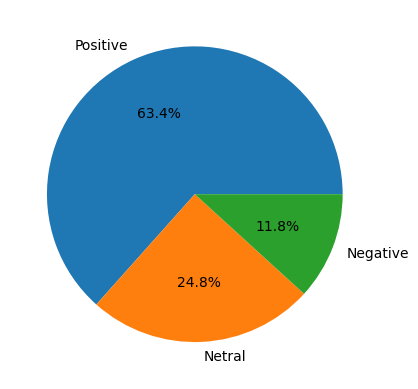

In [7]:
plt.pie(df_article['sentiment_label'].value_counts(), labels=df_article['sentiment_label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

### Character Count 

In [10]:
length = len(df_article['cleaned_article_text'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 3338


In [12]:
df_article['character_length'] = df_article['cleaned_article_text'].str.len()
df_article[['cleaned_article_text', 'sentiment_label', 'character_length']].head(10)

,cleaned_article_text,sentiment_label,character_length
0,kontancoid jakarta lion group mendukung penuh...,Positive,3338
1,sejumlah peristiwa terjadi pada oktober salah...,Positive,929
2,sekretaris umum pp muhammadiyah abdul muti men...,Netral,7191
3,dilarang keras mengambil konten melakukan craw...,Netral,149
4,feb oleh husni anggoro dilihat kali\njakar...,Positive,4568
5,· historical flight lion air membawa kita kemb...,Positive,2110
6,pengadilan negeri pn padang mendenda maskapai ...,Positive,4587
7,gelang emas dan cincin seberat empat gram didu...,Netral,5955
8,penumpang histeris kehilangan emas di bandara ...,Negative,3210
9,januari wib\n dengarkan artikel \ntempoco ...,Positive,5063


### Word Count

In [20]:
def word_count(text):
    parts = re.split(r'[\n\s]+', text)
    parts = [p for p in parts if p]
    return len(parts)

df_article['word_count'] = df_article['cleaned_article_text'].apply(word_count)
df_article[['cleaned_article_text', 'sentiment_label', 'word_count']].head(10)

,cleaned_article_text,sentiment_label,word_count
0,kontancoid jakarta lion group mendukung penuh...,Positive,420
1,sejumlah peristiwa terjadi pada oktober salah...,Positive,140
2,sekretaris umum pp muhammadiyah abdul muti men...,Netral,989
3,dilarang keras mengambil konten melakukan craw...,Netral,22
4,feb oleh husni anggoro dilihat kali\njakar...,Positive,626
5,· historical flight lion air membawa kita kemb...,Positive,294
6,pengadilan negeri pn padang mendenda maskapai ...,Positive,645
7,gelang emas dan cincin seberat empat gram didu...,Netral,803
8,penumpang histeris kehilangan emas di bandara ...,Negative,442
9,januari wib\n dengarkan artikel \ntempoco ...,Positive,692


### Mean Word Length

In [22]:
def mean_word_length(text):
    parts = re.split(r'[\n\s]+', text)
    parts = [p for p in parts if p]
    part_len = [len(p) for p in parts]
    parts_mean = np.mean(part_len)
    return parts_mean

df_article['mean_word_length'] = df_article['cleaned_article_text'].apply(mean_word_length)
df_article[['cleaned_article_text', 'sentiment_label', 'mean_word_length']].head(10)

,cleaned_article_text,sentiment_label,mean_word_length
0,kontancoid jakarta lion group mendukung penuh...,Positive,6.885714
1,sejumlah peristiwa terjadi pada oktober salah...,Positive,5.514286
2,sekretaris umum pp muhammadiyah abdul muti men...,Netral,6.244692
3,dilarang keras mengambil konten melakukan craw...,Netral,5.818182
4,feb oleh husni anggoro dilihat kali\njakar...,Positive,6.263578
5,· historical flight lion air membawa kita kemb...,Positive,6.139456
6,pengadilan negeri pn padang mendenda maskapai ...,Positive,6.055814
7,gelang emas dan cincin seberat empat gram didu...,Netral,6.388543
8,penumpang histeris kehilangan emas di bandara ...,Negative,6.228507
9,januari wib\n dengarkan artikel \ntempoco ...,Positive,6.251445


### Mean Sentence Length

In [24]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(df_article['cleaned_article_text'][0])])

np.float64(3336.0)

In [26]:
df_article['mean_sent_length'] = df_article['cleaned_article_text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df_article[['cleaned_article_text', 'sentiment_label', 'mean_sent_length']].head(10)

,cleaned_article_text,sentiment_label,mean_sent_length
0,kontancoid jakarta lion group mendukung penuh...,Positive,3336.0
1,sejumlah peristiwa terjadi pada oktober salah...,Positive,929.0
2,sekretaris umum pp muhammadiyah abdul muti men...,Netral,7191.0
3,dilarang keras mengambil konten melakukan craw...,Netral,149.0
4,feb oleh husni anggoro dilihat kali\njakar...,Positive,4567.0
5,· historical flight lion air membawa kita kemb...,Positive,2110.0
6,pengadilan negeri pn padang mendenda maskapai ...,Positive,4587.0
7,gelang emas dan cincin seberat empat gram didu...,Netral,5955.0
8,penumpang histeris kehilangan emas di bandara ...,Negative,3209.0
9,januari wib\n dengarkan artikel \ntempoco ...,Positive,5063.0


### Article Length Visualization

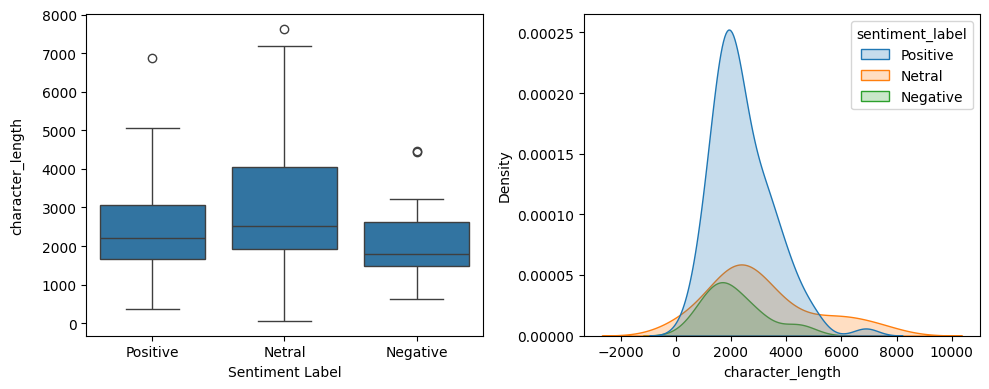

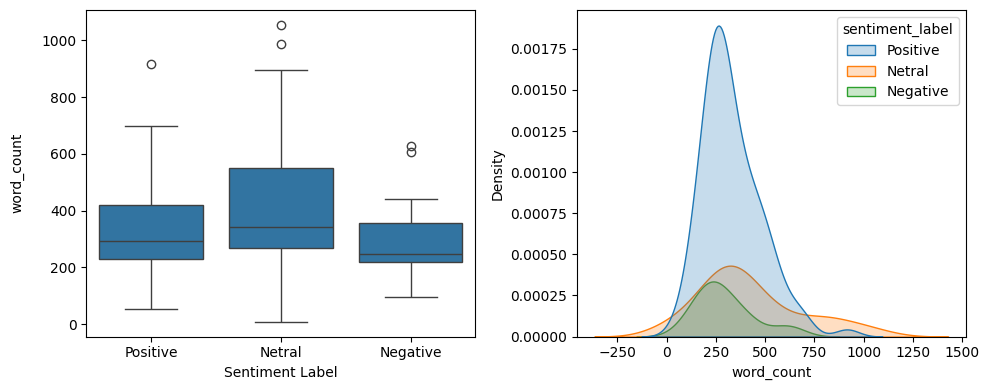

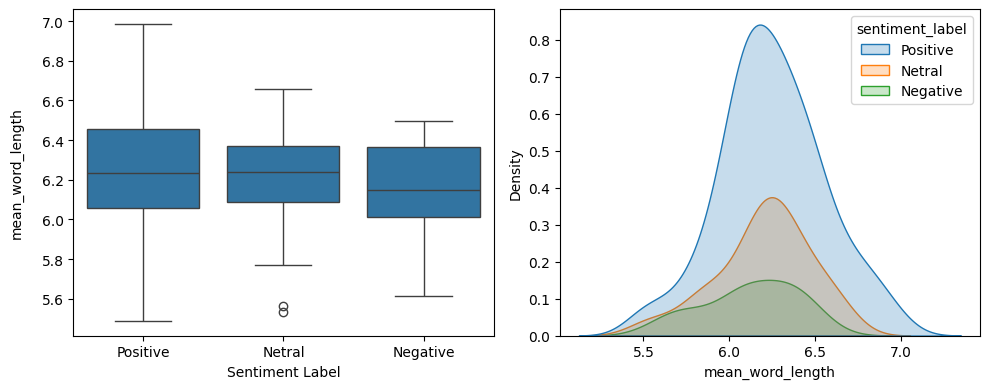

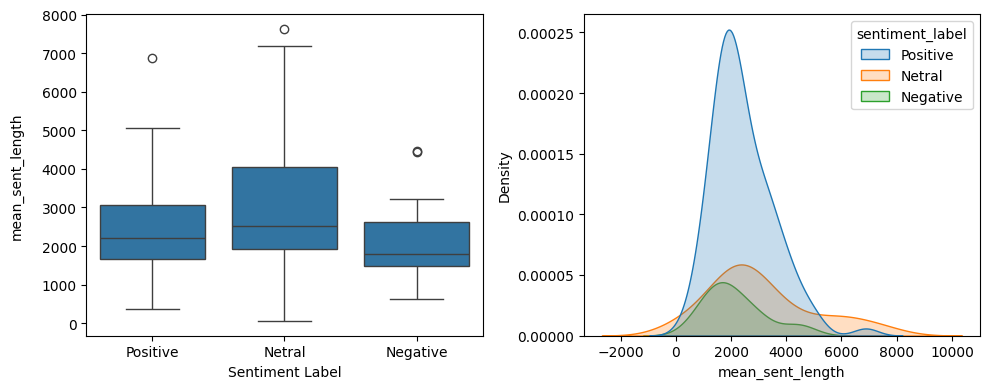

In [31]:
def visualize(col):
    plt.figure(figsize=(10, 4))
    
    # --- Boxplot ---
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_article, x='sentiment_label', y=col)
    plt.ylabel(col, labelpad=12.5)
    plt.xlabel('Sentiment Label')

    # --- KDE Plot ---
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df_article, x=col, hue='sentiment_label', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

length_columns = ['character_length', 'word_count', 'mean_word_length', 'mean_sent_length']
for col in length_columns:
    visualize(col)

### Display Wordcloud

In [4]:
positive_articles_df = df_article[df_article['sentiment_label'] == 'Positive']
negative_articles_df = df_article[df_article['sentiment_label'] == 'Negative']

print(f"\nJumlah artikel Positif: {len(positive_articles_df)}")
print(f"Jumlah artikel Negatif: {len(negative_articles_df)}")

positive_text = ' '.join(positive_articles_df['article_text'])
negative_text = ' '.join(negative_articles_df['article_text'])


Jumlah artikel Positif: 97
Jumlah artikel Negatif: 18


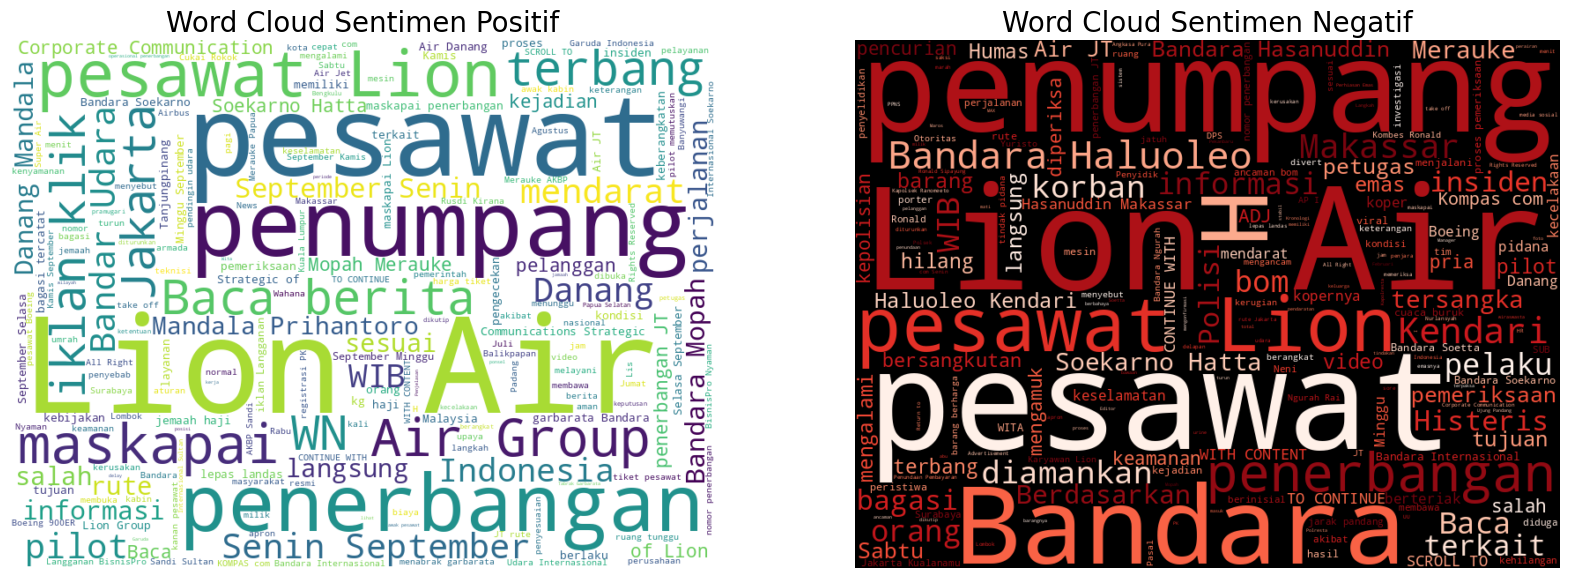

In [5]:
plt.figure(figsize=(20, 10))

# Word Cloud Positif
if positive_text:
    plt.subplot(1, 2, 1)
    wordcloud_positive = WordCloud(
        stopwords=list_stopwords, # Gunakan stopwords untuk membersihkan teks
        width=800,
        height=600,
        background_color='white',
        colormap='viridis'
    ).generate(positive_text)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Word Cloud Sentimen Positif', fontsize=20)
    plt.axis('off')

# Word Cloud Negatif
if negative_text:
    plt.subplot(1, 2, 2)
    wordcloud_negative = WordCloud(
        stopwords=list_stopwords, # Gunakan stopwords untuk membersihkan teks
        width=800,
        height=600,
        background_color='black',
        colormap='Reds'
    ).generate(negative_text)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Word Cloud Sentimen Negatif', fontsize=20)
    plt.axis('off')

plt.show()

### Term Frequency Analysis

In [35]:
def corpus(text):
    parts = re.split(r'[\n\s]+', text)
    parts = [p for p in parts if p]
    return parts
df_article['article_lists'] = df_article['cleaned_article_text'].apply(corpus)
df_article[['cleaned_article_text', 'sentiment_label', 'article_lists']].head(10)

,cleaned_article_text,sentiment_label,article_lists
0,kontancoid jakarta lion group mendukung penuh...,Positive,"[kontancoid, jakarta, lion, group, mendukung, ..."
1,sejumlah peristiwa terjadi pada oktober salah...,Positive,"[sejumlah, peristiwa, terjadi, pada, oktober, ..."
2,sekretaris umum pp muhammadiyah abdul muti men...,Netral,"[sekretaris, umum, pp, muhammadiyah, abdul, mu..."
3,dilarang keras mengambil konten melakukan craw...,Netral,"[dilarang, keras, mengambil, konten, melakukan..."
4,feb oleh husni anggoro dilihat kali\njakar...,Positive,"[feb, oleh, husni, anggoro, dilihat, kali, jak..."
5,· historical flight lion air membawa kita kemb...,Positive,"[·, historical, flight, lion, air, membawa, ki..."
6,pengadilan negeri pn padang mendenda maskapai ...,Positive,"[pengadilan, negeri, pn, padang, mendenda, mas..."
7,gelang emas dan cincin seberat empat gram didu...,Netral,"[gelang, emas, dan, cincin, seberat, empat, gr..."
8,penumpang histeris kehilangan emas di bandara ...,Negative,"[penumpang, histeris, kehilangan, emas, di, ba..."
9,januari wib\n dengarkan artikel \ntempoco ...,Positive,"[januari, wib, dengarkan, artikel, tempoco, ja..."


In [37]:
corpus = []
for i in trange(df_article.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df_article['article_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 143531.32it/s]


53371

In [40]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('dan', 1117),
 ('yang', 1104),
 ('pesawat', 1030),
 ('lion', 950),
 ('air', 949),
 ('di', 948),
 ('penerbangan', 597),
 ('penumpang', 543),
 ('untuk', 487),
 ('dengan', 483)]

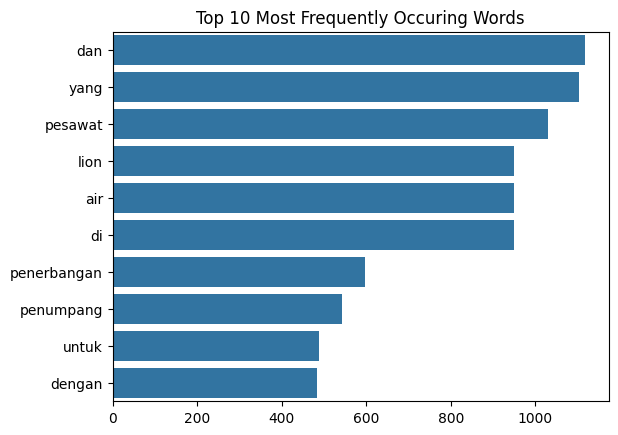

In [41]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

### Most Frequently occuring N_grams

In [43]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_article['cleaned_article_text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

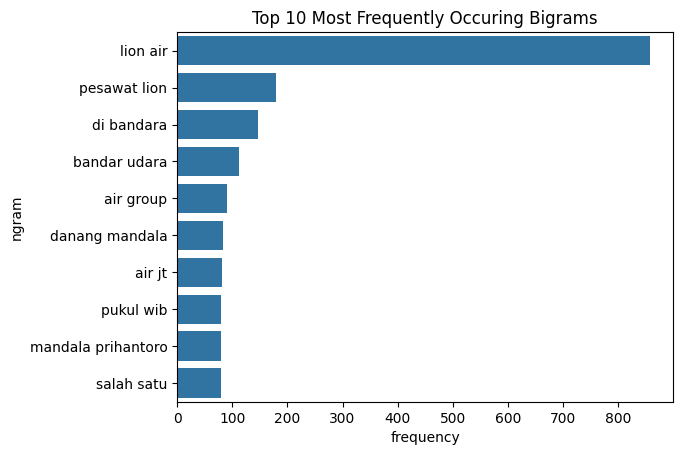

In [44]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [46]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_article['cleaned_article_text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

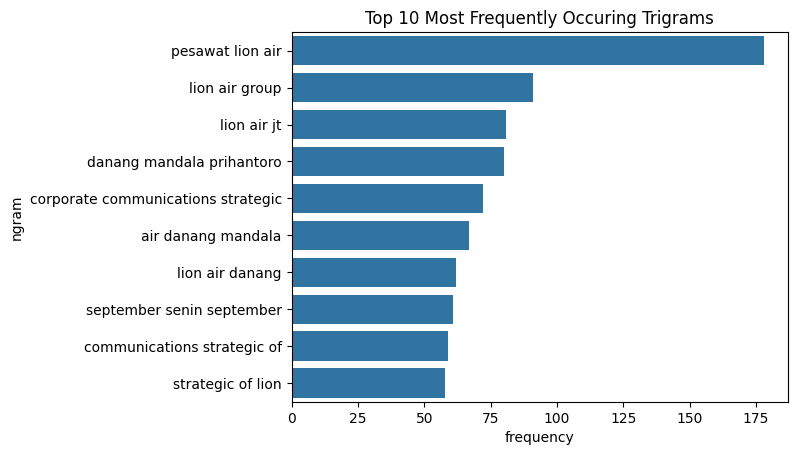

In [47]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()